In [7]:
import keras
#import keras.utils
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, BatchNormalization
from keras.optimizers import RMSprop, SGD
from keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt
import numpy as np
import os

In [8]:
datagen = ImageDataGenerator(validation_split=0.2,
                             rescale=1./255 ,
                             shear_range=0.2,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             fill_mode='nearest',
                             horizontal_flip=True)
TRAIN_DIR = 'ahmraic'

train_generator = datagen.flow_from_directory(
    TRAIN_DIR, 
    subset='training',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    TRAIN_DIR,
    subset='validation',
        target_size=(200, 200),
        batch_size=32,
        class_mode='categorical'
)

Found 95 images belonging to 9 classes.
Found 18 images belonging to 9 classes.


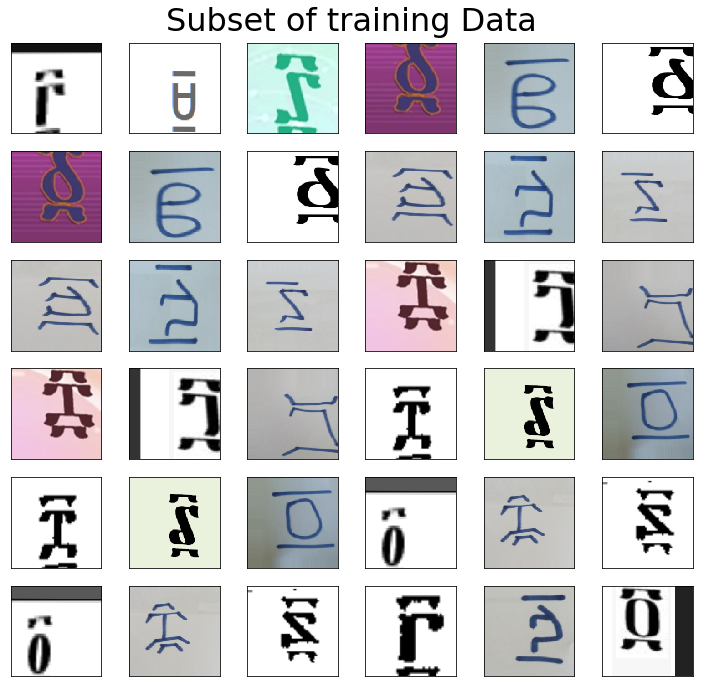

In [9]:
def plot_images(img_gen, img_title):
    fig, ax = plt.subplots(6,6, figsize=(10,10))
    plt.suptitle(img_title, size=32)
    plt.setp(ax, xticks=[], yticks=[])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    for (img, label) in img_gen:
        for i in range(6):
            for j in range(6):
                if i*6 + j < 256:
                    ax[i][j].imshow(img[i*3 + j])
        break

plot_images(train_generator, "Subset of training Data")

In [10]:
from keras.preprocessing import image
train_dir = 'ahmraic/7/'
fnames = [os.path.join(train_dir, fname) for fname in os.listdir(train_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))

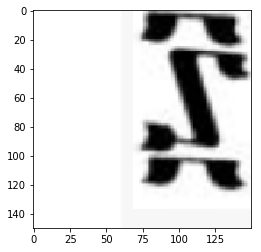

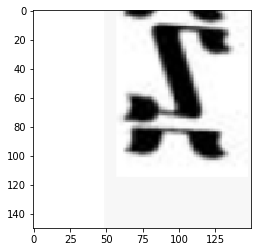

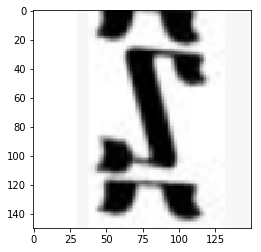

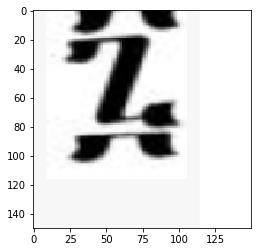

In [11]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1 
    if i%4 == 0:
        break
        
plt.show()

In [12]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = (200, 200, 3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(lr=1e-4), 
             metrics=['acc'])

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)       147584    
__________

In [ ]:
# history = model.fit_generator(
#     train_generator,
#     steps_per_epoch=20,
#     epochs = 20,
#     validation_data=validation_generator,
#     validation_steps=10)
history = model.fit_generator(generator=
                    train_generator,
                    steps_per_epoch=20,
                    validation_data=validation_generator,
                    validation_steps=10,
                    epochs=30)

Epoch 1/30
20/20 [==============================] - 11s 550ms/step - loss: 2.1912 - acc: 0.0750 - val_loss: 2.1967 - val_acc: 0.0833
Epoch 2/30
20/20 [==============================] - 11s 539ms/step - loss: 2.1926 - acc: 0.1290 - val_loss: 2.1988 - val_acc: 0.1111
Epoch 3/30
20/20 [==============================] - 11s 560ms/step - loss: 2.2013 - acc: 0.1251 - val_loss: 2.1990 - val_acc: 0.1944
Epoch 4/30
20/20 [==============================] - 15s 733ms/step - loss: 2.2027 - acc: 0.1375 - val_loss: 2.1968 - val_acc: 0.1111
Epoch 5/30
 4/20 [=====>........................] - ETA: 8s - loss: 2.1793 - acc: 0.1458

In [ ]:
# layer = model.get_layer('dropout_5')